<a href="https://colab.research.google.com/github/zkhandker/rupi-kaur/blob/main/Zuhair01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies 


In [2]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

# Import all remaining packages
import numpy as np
import os
import time
import functools
from IPython import display as ipythondisplay
from tqdm import tqdm
!apt-get install abcmidi timidity > /dev/null 2>&1

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
## assert len(tf.config.list_physical_devices('GPU')) > 0
import pathlib

## Load Poems 


In [30]:
#data_url = 'https://raw.githubusercontent.com/zkhandker/rupi-kaur/main/data/test.txt'
#dataset = tf.keras.utils.get_file('test.txt',
#    data_url)
#dataset_dir = pathlib.Path(dataset).parent

In [ ]:
# tf.io.gfile.remove(dataset_dir/'test2.txt')

In [31]:
#list(dataset_dir.iterdir())

In [32]:
#sample_file = dataset_dir/'test.txt'
#with open(sample_file) as f:
  #print(f.read())
#  sentence=f.read()
#  print(sentence)

In [3]:
path_to_file = tf.keras.utils.get_file('combined2', 'https://raw.githubusercontent.com/zkhandker/rupi-kaur/main/data/combined2.txt')
with open(path_to_file) as f: 
  poems = f.read()
  #print(poems)

## Vectorize Poems 


In [4]:
#sentence = "The wide road shimmered in the hot sun"
tokens = list(poems.lower().split())
print(len(tokens))

13374


In [5]:
vocab, index = {}, 1 # start indexing from 1
vocab['<pad>'] = 0 # add a padding token 
for token in tokens:
  if token not in vocab: 
    vocab[token] = index
    index += 1
vocab_size = len(vocab)
print(vocab)
print(vocab_size)

{'<pad>': 0, 'how': 1, 'is': 2, 'it': 3, 'so': 4, 'easy': 5, 'for': 6, 'you': 7, 'to': 8, 'be': 9, 'kind': 10, 'people': 11, 'he': 12, 'asked': 13, 'milk': 14, 'and': 15, 'honey': 16, 'dripped': 17, 'from': 18, 'my': 19, 'lips': 20, 'as': 21, 'i': 22, 'answered': 23, 'cause': 24, 'have': 25, 'not': 26, 'been': 27, 'me': 28, 'the': 29, 'first': 30, 'boy': 31, 'that': 32, 'kissed': 33, 'held': 34, 'shoulders': 35, 'down': 36, 'like': 37, 'handlebars': 38, 'of': 39, 'bicycle': 40, 'ever': 41, 'rode': 42, 'was': 43, 'five': 44, 'had': 45, 'smell': 46, 'starvation': 47, 'on': 48, 'his': 49, 'which': 50, 'picked': 51, 'up': 52, 'father': 53, 'feasting': 54, 'mother': 55, 'at': 56, '4': 57, 'a.m.': 58, 'teach': 59, 'body': 60, 'giving': 61, 'those': 62, 'wanted': 63, 'should': 64, 'feel': 65, 'anything': 66, 'less': 67, 'than': 68, 'whole': 69, 'god': 70, 'did': 71, 'empty': 72, '4:25': 73, "i've": 74, 'sex': 75, 'she': 76, 'said': 77, 'but': 78, "don't": 79, 'know': 80, 'what': 81, 'making':

In [6]:
inverse_vocab = {index: token for token, index in vocab.items()}
print(inverse_vocab)

{0: '<pad>', 1: 'how', 2: 'is', 3: 'it', 4: 'so', 5: 'easy', 6: 'for', 7: 'you', 8: 'to', 9: 'be', 10: 'kind', 11: 'people', 12: 'he', 13: 'asked', 14: 'milk', 15: 'and', 16: 'honey', 17: 'dripped', 18: 'from', 19: 'my', 20: 'lips', 21: 'as', 22: 'i', 23: 'answered', 24: 'cause', 25: 'have', 26: 'not', 27: 'been', 28: 'me', 29: 'the', 30: 'first', 31: 'boy', 32: 'that', 33: 'kissed', 34: 'held', 35: 'shoulders', 36: 'down', 37: 'like', 38: 'handlebars', 39: 'of', 40: 'bicycle', 41: 'ever', 42: 'rode', 43: 'was', 44: 'five', 45: 'had', 46: 'smell', 47: 'starvation', 48: 'on', 49: 'his', 50: 'which', 51: 'picked', 52: 'up', 53: 'father', 54: 'feasting', 55: 'mother', 56: 'at', 57: '4', 58: 'a.m.', 59: 'teach', 60: 'body', 61: 'giving', 62: 'those', 63: 'wanted', 64: 'should', 65: 'feel', 66: 'anything', 67: 'less', 68: 'than', 69: 'whole', 70: 'god', 71: 'did', 72: 'empty', 73: '4:25', 74: "i've", 75: 'sex', 76: 'she', 77: 'said', 78: 'but', 79: "don't", 80: 'know', 81: 'what', 82: 'maki

In [7]:
inverse_vocab[2]

'is'

In [8]:
vectorized_poems = np.array([vocab[word] for word in tokens])
print(vectorized_poems)

[   1    2    3 ... 1490   22 1491]


In [9]:
print ('{} ---- characters mapped to int ----> {}'.format(repr(poems[:10]), vectorized_poems[:10]))
# check that vectorized_poems is a numpy array
assert isinstance(vectorized_poems, np.ndarray), "returned result should be a numpy array"

'how is it ' ---- characters mapped to int ----> [ 1  2  3  4  5  6  7  8  9 10]


## Define Batch 


In [10]:
### Batch definition to create training examples ###

def get_batch(vectorized_songs, seq_length, batch_size):
  # the length of the vectorized songs string
  n = vectorized_songs.shape[0] - 1
  # randomly choose the starting indices for the examples in the training batch
  idx = np.random.choice(n-seq_length, batch_size)

  '''TODO: construct a list of input sequences for the training batch'''
  input_batch = [vectorized_songs[i : i+seq_length] for i in idx]
  # input_batch = # TODO
  '''TODO: construct a list of output sequences for the training batch'''
  output_batch = [vectorized_songs[i+1 : i+seq_length+1] for i in idx]
  # output_batch = # TODO

  # x_batch, y_batch provide the true inputs and targets for network training
  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])
  return x_batch, y_batch


# Perform some simple tests to make sure your batch function is working properly! 
test_args = (vectorized_poems, 10, 2)
if not mdl.lab1.test_batch_func_types(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_shapes(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_next_step(get_batch, test_args): 
   print("======\n[FAIL] could not pass tests")
else: 
   print("======\n[PASS] passed all tests!")

[PASS] test_batch_func_types
[PASS] test_batch_func_shapes
[PASS] test_batch_func_next_step
[PASS] passed all tests!


In [11]:
x_batch, y_batch = get_batch(vectorized_poems, seq_length=5, batch_size=1)

In [12]:
print(x_batch)
print(y_batch)

[[ 109    7    6   62 1240]]
[[   7    6   62 1240 1243]]


## Define RNN 


In [13]:
def LSTM(rnn_units): 
  return tf.keras.layers.LSTM(
    rnn_units, 
    return_sequences=True, 
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True,
  )

In [14]:
### Defining the RNN Model ###

'''TODO: Add LSTM and Dense layers to define the RNN model using the Sequential API.'''
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    # Layer 1: Embedding layer to transform indices into dense vectors 
    #   of a fixed embedding size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),

    # Layer 2: LSTM with `rnn_units` number of units. 
    # TODO: Call the LSTM function defined above to add this layer.
    LSTM(rnn_units), 
    # LSTM('''TODO'''),

    # Layer 3: Dense (fully-connected) layer that transforms the LSTM output
    #   into the vocabulary size. 
    # TODO: Add the Dense layer.
    tf.keras.layers.Dense(vocab_size)
    # '''TODO: DENSE LAYER HERE'''
  ])

  return model

# Build a simple model with default hyperparameters. You will get the 
#   chance to change these later.
model = build_model(len(vocab), embedding_dim=1600, rnn_units=1024, batch_size=32)

In [15]:
len(vocab)

1529

## Test Untrained RNN 


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (32, None, 1600)          2446400   
_________________________________________________________________
lstm (LSTM)                  (32, None, 1024)          10752000  
_________________________________________________________________
dense (Dense)                (32, None, 1529)          1567225   
Total params: 14,765,625
Trainable params: 14,765,625
Non-trainable params: 0
_________________________________________________________________


In [17]:
x, y = get_batch(vectorized_poems, seq_length=10, batch_size=32)
pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       (32, 10)  # (batch_size, sequence_length)
Prediction shape:  (32, 10, 1529) # (batch_size, sequence_length, vocab_size)


In [18]:
x[0]

array([1456,  459,   48,    8,  140,   26,   25,  192,  163,  131])

In [19]:
sampled_indices = tf.random.categorical(pred[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
sampled_indices

array([1169, 1058,   75,  863, 1117, 1376,   99,  445,  931,  378])

In [20]:
print("Input: \n")
for i in x[0]:
  print(inverse_vocab[i])

Input: 

worth
holding
on
to
would
not
have
let
go
when


In [21]:
print("Output: \n")
for i in sampled_indices:
  print(inverse_vocab[i])

Output: 

muscles
looks
sex
mouths
faith
temptingly
am
risk
trade
abandon


## Train 


In [22]:
### Defining the loss function ###

'''TODO: define the loss function to compute and return the loss between
    the true labels and predictions (logits). Set the argument from_logits=True.'''
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  # loss = tf.keras.losses.sparse_categorical_crossentropy('''TODO''', '''TODO''', from_logits=True) # TODO
  return loss

'''TODO: compute the loss using the true next characters from the example batch 
    and the predictions from the untrained model several cells above'''
example_batch_loss = compute_loss(y, pred)
# example_batch_loss = compute_loss('''TODO''', '''TODO''') # TODO

print("Prediction shape: ", pred.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (32, 10, 1529)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       7.3324547


In [23]:
### Hyperparameter setting and optimization ###

# Optimization parameters:
num_training_iterations = 500  # Increase this to train longer
batch_size = 4  # Experiment between 1 and 64
seq_length = 10  # Experiment between 50 and 500
learning_rate = 5e-3  # Experiment between 1e-5 and 1e-1

# Model parameters: 
vocab_size = len(vocab)
embedding_dim = 1600 
rnn_units = 1024  # Experiment between 1 and 2048

# Checkpoint location: 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

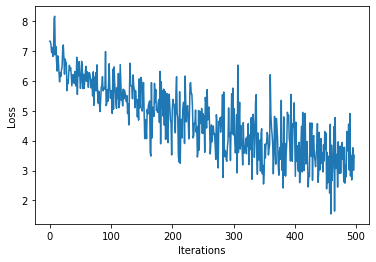

100%|██████████| 500/500 [09:01<00:00,  1.08s/it]


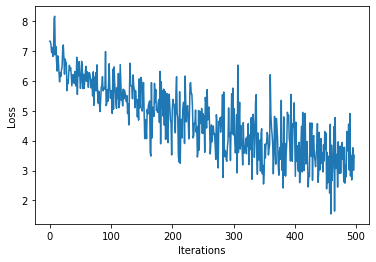

In [24]:
### Define optimizer and training operation ###

'''TODO: instantiate a new model for training using the `build_model`
  function and the hyperparameters created above.'''
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size)
# model = build_model('''TODO: arguments''')

'''TODO: instantiate an optimizer with its learning rate.
  Checkout the tensorflow website for a list of supported optimizers.
  https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/
  Try using the Adam optimizer to start.'''
optimizer = tf.keras.optimizers.Adam(learning_rate)
# optimizer = # TODO

@tf.function
def train_step(x, y): 
  # Use tf.GradientTape()
  with tf.GradientTape() as tape:
  
    '''TODO: feed the current input into the model and generate predictions'''
    y_hat = model(x) # TODO
    # y_hat = model('''TODO''')
  
    '''TODO: compute the loss!'''
    loss = compute_loss(y, y_hat) # TODO
    # loss = compute_loss('''TODO''', '''TODO''')

  # Now, compute the gradients 
  '''TODO: complete the function call for gradient computation. 
      Remember that we want the gradient of the loss with respect all 
      of the model parameters. 
      HINT: use `model.trainable_variables` to get a list of all model
      parameters.'''
  grads = tape.gradient(loss, model.trainable_variables) # TODO
  # grads = tape.gradient('''TODO''', '''TODO''')
  
  # Apply the gradients to the optimizer so it can update the model accordingly
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

##################
# Begin training!#
##################

history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for iter in tqdm(range(num_training_iterations)):

  # Grab a batch and propagate it through the network
  x_batch, y_batch = get_batch(vectorized_poems, seq_length, batch_size)
  loss = train_step(x_batch, y_batch)

  # Update the progress bar
  history.append(loss.numpy().mean())
  plotter.plot(history)

  # Update the model with the changed weights!
  if iter % 100 == 0:     
    model.save_weights(checkpoint_prefix)
    
# Save the trained model and the weights
model.save_weights(checkpoint_prefix)

## Generate Poem 


In [25]:
'''TODO: Rebuild the model using a batch_size=1'''
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1) # TODO
# model = build_model('''TODO''', '''TODO''', '''TODO''', batch_size=1)

# Restore the model weights for the last checkpoint after training
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 1600)           2446400   
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 1024)           10752000  
_________________________________________________________________
dense_2 (Dense)              (1, None, 1529)           1567225   
Total params: 14,765,625
Trainable params: 14,765,625
Non-trainable params: 0
_________________________________________________________________


In [66]:
start_string=['look', 'down', 'at', 'your', 'body']
input_eval = [vocab[s] for s in start_string]
print(input_eval)

[396, 36, 56, 108, 60]


In [75]:
### Prediction of a generated song ###

def generate_text(model, start_string, generation_length=75):
  # Evaluation step (generating text using the learned RNN model)

  '''TODO: convert the start string to numbers (vectorize)'''
  input_eval = [vocab[s] for s in start_string] # TODO
  # input_eval = ['''TODO''']
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Here batch size == 1
  model.reset_states()
  tqdm._instances.clear()

  for i in tqdm(range(generation_length)):
      '''TODO: evaluate the inputs and generate the next character predictions'''
      predictions = model(input_eval)
      # predictions = model('''TODO''')
      
      # Remove the batch dimension
      predictions = tf.squeeze(predictions, 0)
      
      '''TODO: use a multinomial distribution to sample'''
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      # predicted_id = tf.random.categorical('''TODO''', num_samples=1)[-1,0].numpy()
      
      # Pass the prediction along with the previous hidden state
      #   as the next inputs to the model
      input_eval = tf.expand_dims([predicted_id], 0)
      
      '''TODO: add the predicted character to the generated text!'''
      # Hint: consider what format the prediction is in vs. the output
      text_generated.append(inverse_vocab[predicted_id]) # TODO 
      # text_generated.append('''TODO''')
    
  return (' '.join(start_string) + ' ' + ' '.join(text_generated))

In [76]:
'''TODO: Use the model and the function defined above to generate ABC format text of length generation_length!'''
generated_text = generate_text(model, start_string=['look', 'down', 'at', 'your', 'body'], generation_length=75)

100%|██████████| 75/75 [00:01<00:00, 69.52it/s]


In [77]:
print(generated_text)

look down at your body is still once on your hotel is. to do has grace just being a woman makes me utterly whole and complete my women in the neighbors. and you will come and when they have gotten a good look at everything you my family theyíre the mouths looks at him - bumps need you were temptingly beautiful as if i was staring sure public were bed replaced by the sad reality of what making love it's
